In [2]:
import osmnx as ox
import networkx as nx
from pprint import pprint

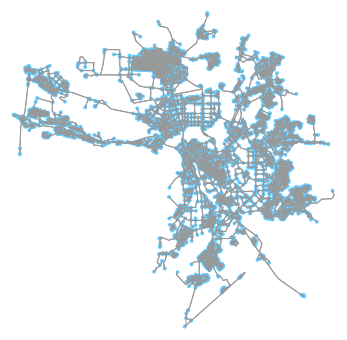

In [3]:
import matplotlib.pyplot as plt

place = {'city' : 'Kazan',
         'country' : 'Russia'}
G = ox.graph_from_place(place, network_type='drive')


fig, ax = ox.plot_graph(G)

In [69]:
print(nx.all_pairs_dijkstra_path(G).gi_code)

<code object all_pairs_dijkstra_path at 0x123f895b0, file "/Users/milena/miniconda3/envs/ox/lib/python3.8/site-packages/networkx/algorithms/shortest_paths/weighted.py", line 1060>


In [60]:
G.edges()

OutMultiEdgeDataView([(411385856, 295019719), (411385856, 411385858), (411385856, 701685269), (411385858, 292927711), (411385858, 292927471), (411385858, 411385859), (411385859, 411385858), (411385859, 411385860), (411385859, 295019720), (411385860, 2402198114), (411385860, 411385856), (863944711, 863940623), (863944711, 863949261), (863944711, 1846433876), (863944714, 863940778), (863944714, 863948890), (863944714, 863940634), (863944714, 863949263), (1835352078, 1344494462), (1835352078, 1038245872), (1835352078, 3605544164), (959119377, 730352708), (959119377, 959119378), (959119378, 959119377), (959119378, 870542935), (1931214868, 298122381), (872562710, 295856863), (872562710, 872562687), (872562710, 3282730583), (873775127, 872563807), (873775127, 847173160), (873775127, 2016222212), (2427535384, 836418388), (3664281626, 503347805), (842432538, 1428983597), (842432538, 842431386), (842432538, 842431656), (842432538, 842432105), (1977794586, 952086042), (1977794586, 952084912), (1

In [4]:
buildings = ox.footprints.footprints_from_place(place, footprint_type='building', retain_invalid=False, which_result=1)

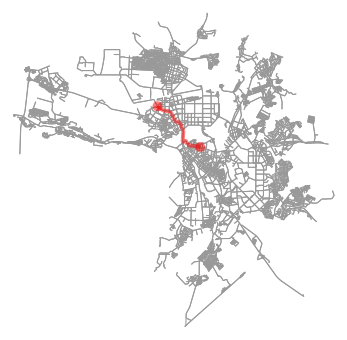

In [5]:
route = nx.shortest_path(G,411385856,730382549, weight='length', method='dijkstra')
fig, ax = ox.plot_graph_route(G, route, node_size=0)


In [6]:
net_dist = nx.shortest_path_length(G, 411385856, 730382549, weight='length',method='dijkstra')
net_dist

7052.765

### Сохранение id больниц и домов в списки


In [7]:
hospital = []
apartments = []
build = buildings.head(10000)['building'].to_dict()

for key,value in build.items():
    if value == 'hospital':
        hospital.append(key)
    elif value == 'apartments':
        apartments.append(key)

print(hospital)
print(apartments)
print(build)
        

[61424274, 61424329, 62040317, 62040327, 62040340, 72775188, 72775515, 72775583, 72775638, 72775692, 73658436, 73658763, 73899727, 73899735, 73899850, 73899874, 73899997, 74981800, 76250603, 81652719, 81652853, 83891701, 84676196, 87331521, 87672530, 90635168, 90635169, 92007413, 92939135, 94694742, 94694818, 94694870, 94694907, 95045805, 95045884, 95048637, 95048865, 95606471, 95852834, 95852938, 95852982, 95852990, 95853006, 95853029, 95853039, 95853043, 96265460, 96265463, 96265474, 96265498, 96265504, 96265507, 96265519, 96337815, 96705090, 97060536, 97465755, 97586616, 97586619, 97586622, 99683730, 99981769, 100103329, 108466435, 115079096, 118437574, 123422866, 124790073, 143405272, 143405274, 144154363, 144154365]
[56255883, 56255887, 56255889, 56255891, 56255892, 56255893, 56255896, 56255897, 56255898, 56255899, 56255900, 56255901, 56255906, 56255907, 56255910, 56255911, 56255912, 56255913, 56255914, 56255915, 61424177, 61424184, 61424186, 61424188, 61424193, 61424195, 61424197

### Поиск по id геолокаций и нужных данных + сохранение их в словарь вида:
{ <br>
id1 : {Данные},<br>
id2 : {Данные}<br>
}

In [13]:
a = buildings.head(1).to_dict()
for key,i in a['geometry'].items():
    print(key)
bounds = a['geometry'][56255058].bounds
nearest_node = ox.get_nearest_node(G, ((bounds[0]+bounds[2])/2, (bounds[1]+bounds[3]/2)))
print("nearest node", nearest_node)
a['nodes']


56255058
nearest node 1038238272


{56255058: [706044349,
  4195618206,
  4195618205,
  706044384,
  706044386,
  706044403,
  4932698064,
  4932698063,
  706044349]}

### Как найти расстояние. Формула Григора
 long = message.location.longitude<br>
    lat = message.location.latitude<br>
    la = 55.688815<br>
    lo = 37.904171<br>
    R = 111138<br>
    x = (long - lo) * math.cos((lat + la) * 0.00872664626)<br>
    y = lat - la<br>
    d = int(R * math.sqrt(x * x + y * y))<br>

In [ ]:
['__and__', '__array_interface__'
 , '__bool__', '__class__', '__del__', 
 '__delattr__', '__dict__', '__dir__', '__doc__', 
 '__eq__', '__format__', '__ge__', '__geo_interface__', 
 '__geom__', '__getattribute__', '__gt__', '__hash__', 
 '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', 
 '__ne__', '__new__', '__nonzero__', '__or__', '__p__', '__reduce__', '__reduce_ex__',
 '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', 
 '__weakref__', '__xor__', '_crs', '_ctypes_data', '_exterior', '_geom', '_get_coords', '_interiors',
 '_is_empty', '_lgeos', '_ndim', '_other_owned', '_repr_svg_', '_set_coords', 'almost_equals', 'area', 
 'array_interface_base', 'boundary', 'bounds', 'buffer', 'centroid', 'contains', 'convex_hull', 'coords',
 'covers', 'crosses', 'ctypes', 'difference', 'disjoint', 'distance', 'empty', 'envelope', 'equals',
 'equals_exact', 'exterior', 'from_bounds', 'geom_type', 'geometryType', 'has_z', 'hausdorff_distance',
 'impl', 'interiors', 'interpolate', 'intersection', 'intersects', 'is_closed', 'is_empty', 'is_ring',
 'is_simple', 'is_valid', 'length', 'minimum_rotated_rectangle', 'overlaps', 'project', 'relate',
 'relate_pattern', 'representative_point', 'simplify', 'svg', 'symmetric_difference'
 , 'to_wkb', 'to_wkt', 'touches', 'type', 'union', 'within', 'wkb', 'wkb_hex', 'wkt', 'xy']

In [ ]:
a = buildings.head(2).to_dict()
pprint(a)

In [ ]:
a = buildings.head(20).to_dict()
pprint(a)

In [7]:
G_pd = nx.to_pandas_adjacency(G)

           411385856   411385858   411385859   411385860   863944711   \
411385856         0.0         1.0         0.0         0.0         0.0   
411385858         0.0         0.0         1.0         0.0         0.0   
411385859         0.0         1.0         0.0         1.0         0.0   
411385860         1.0         0.0         0.0         0.0         0.0   
863944711         0.0         0.0         0.0         0.0         0.0   
...               ...         ...         ...         ...         ...   
411385847         0.0         0.0         0.0         0.0         0.0   
895549428         0.0         0.0         0.0         0.0         0.0   
842432506         0.0         0.0         0.0         0.0         0.0   
502874107         0.0         0.0         0.0         0.0         0.0   
872562687         0.0         0.0         0.0         0.0         0.0   

           863944714   1835352078  959119377   959119378   1931214868  ...  \
411385856         0.0         0.0         0.0

In [ ]:
G_pd = nx.to_pandas_adjacency(G)
print(G_pd)